In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn import tree
import xgboost as xgb
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree

import gc
from tqdm import tqdm

In [2]:
column_defs = pd.read_excel('data\LCDataDictionary.xlsx',index_col='LoanStatNew')
column_defs.columns

Index(['Description'], dtype='object')

In [3]:
pd.options.display.max_rows = 15

In [4]:
column_defs

,Description
LoanStatNew,
acc_now_delinq,The number of accounts on which the borrower i...
acc_open_past_24mths,Number of trades opened in past 24 months.
addr_state,The state provided by the borrower in the loan...
all_util,Balance to credit limit on all trades
annual_inc,The self-reported annual income provided by th...
...,...
settlement_amount,The loan amount that the borrower has agreed t...
settlement_percentage,The settlement amount as a percentage of the p...
settlement_term,The number of months that the borrower will be...


In [5]:
import os
for dirname, _, filenames in os.walk('C:\\Users\\sergi\\Documents\\Flatiron\\Course Materials\\Capstone\\Capstone-Placeholder'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\sergi\Documents\Flatiron\Course Materials\Capstone\Capstone-Placeholder\Capstone Project Proposal.docx
C:\Users\sergi\Documents\Flatiron\Course Materials\Capstone\Capstone-Placeholder\Prelim Workbook.ipynb
C:\Users\sergi\Documents\Flatiron\Course Materials\Capstone\Capstone-Placeholder\~$pstone Project Proposal.docx
C:\Users\sergi\Documents\Flatiron\Course Materials\Capstone\Capstone-Placeholder\.git\config
C:\Users\sergi\Documents\Flatiron\Course Materials\Capstone\Capstone-Placeholder\.git\description
C:\Users\sergi\Documents\Flatiron\Course Materials\Capstone\Capstone-Placeholder\.git\HEAD
C:\Users\sergi\Documents\Flatiron\Course Materials\Capstone\Capstone-Placeholder\.git\hooks\applypatch-msg.sample
C:\Users\sergi\Documents\Flatiron\Course Materials\Capstone\Capstone-Placeholder\.git\hooks\commit-msg.sample
C:\Users\sergi\Documents\Flatiron\Course Materials\Capstone\Capstone-Placeholder\.git\hooks\fsmonitor-watchman.sample
C:\Users\sergi\Documents\Flatiron\Course Material

In [6]:
def column_info(col_name):
    return column_defs.loc[col_name]['Description']

In [7]:
columns_to_drop = ['mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'mths_since_rcnt_il',
 'il_util',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_revol_delinq',
 'revol_bal_joint',
 'sec_app_fico_range_low',
 'sec_app_fico_range_high',
 'sec_app_earliest_cr_line',
 'sec_app_inq_last_6mths',
 'sec_app_mort_acc',
 'sec_app_open_acc',
 'sec_app_revol_util',
 'sec_app_open_act_il',
 'sec_app_num_rev_accts',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'deferral_term',
 'hardship_amount',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_length',
 'hardship_dpd',
 'hardship_loan_status',
 'orig_projected_additional_accrued_interest',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amount','policy_code','url','Unnamed: 0','out_prncp_inv','total_pymnt_inv','funded_amnt_inv','funded_amnt',
              'num_sats','tot_hi_cred_lim','num_rev_tl_bal_gt_0','collection_recovery_fee'
             ,'bc_open_to_buy','percent_bc_gt_75','open_acc','num_actv_bc_tl','num_actv_rev_tl','num_rev_accts'
             ,'total_rev_hi_lim','all_util', 'inq_last_12m', 'total_cu_tl', 'open_acc_6m',
       'open_rv_12m', 'open_act_il', 'open_il_24m', 'total_bal_il',
       'open_il_12m', 'open_rv_24m', 'max_bal_bc', 'inq_fi']

In [9]:
corr_drops = ['out_prncp_inv','total_pymnt_inv','funded_amnt_inv','funded_amnt',
              'num_sats','tot_hi_cred_lim','num_rev_tl_bal_gt_0','collection_recovery_fee'
             ,'bc_open_to_buy','percent_bc_gt_75','open_acc','num_actv_bc_tl','num_actv_rev_tl','num_rev_accts'
             ,'total_rev_hi_lim']

In [8]:
df = pd.read_csv('data\Loan_status_2007-2020Q3.gzip',low_memory=False)

In [9]:
df.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [9]:
def reduce_mem_usage(df, int_cast=True, obj_to_category=False, subset=None):
    """
    Iterate through all the columns of a dataframe and modify the data type to reduce memory usage.
    :param df: dataframe to reduce (pd.DataFrame)
    :param int_cast: indicate if columns should be tried to be casted to int (bool)
    :param obj_to_category: convert non-datetime related objects to category dtype (bool)
    :param subset: subset of columns to analyse (list)
    :return: dataset with the column dtypes adjusted (pd.DataFrame)
    """
    start_mem = df.memory_usage().sum() / 1024 ** 2;
    gc.collect()
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    cols = subset if subset is not None else df.columns.tolist()

    for col in tqdm(cols):
        col_type = df[col].dtype

        if col_type != object and col_type.name != 'category' and 'datetime' not in col_type.name:
            c_min = df[col].min()
            c_max = df[col].max()

            # test if column can be converted to an integer
            treat_as_int = str(col_type)[:3] == 'int'
            if int_cast and not treat_as_int:
                treat_as_int = check_if_integer(df[col])

            if treat_as_int:
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.uint8).min and c_max < np.iinfo(np.uint8).max:
                    df[col] = df[col].astype(np.uint8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.uint16).min and c_max < np.iinfo(np.uint16).max:
                    df[col] = df[col].astype(np.uint16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.uint32).min and c_max < np.iinfo(np.uint32).max:
                    df[col] = df[col].astype(np.uint32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
                elif c_min > np.iinfo(np.uint64).min and c_max < np.iinfo(np.uint64).max:
                    df[col] = df[col].astype(np.uint64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        elif 'datetime' not in col_type.name and obj_to_category:
            df[col] = df[col].astype('category')
    gc.collect()
    end_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage after optimization is: {:.3f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [10]:
df.drop(columns=columns_to_drop,axis=1,inplace=True)

In [11]:
reduce_mem_usage(df,int_cast=False)

Memory usage of dataframe is 1673.98 MB


100%|██████████| 75/75 [00:12<00:00,  6.17it/s]


Memory usage after optimization is: 876.050 MB
Decreased by 47.7%


,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,1077501,5000.0,36 months,10.65%,162.87500,B,B2,NaN,10+ years,RENT,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,N,N
1,1077430,2500.0,60 months,15.27%,59.84375,C,C4,Ryder,< 1 year,RENT,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,N,N
2,1077175,2400.0,36 months,15.96%,84.31250,C,C5,NaN,10+ years,RENT,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,N,N
3,1076863,10000.0,36 months,13.49%,339.25000,C,C1,AIR RESOURCES BOARD,10+ years,RENT,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,N,N
4,1075358,3000.0,60 months,12.69%,67.81250,B,B5,University Medical Group,1 year,RENT,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925488,102556443,24000.0,60 months,23.99%,690.50000,E,E2,Senior Escrow Officer,< 1 year,RENT,...,1.0,2.0,87.5000,1.0,1.0,60812.0,28200.0,64422.0,N,N
2925489,102653304,10000.0,36 months,7.99%,313.25000,A,A5,Rn,10+ years,MORTGAGE,...,0.0,2.0,92.6250,0.0,0.0,55863.0,34800.0,70203.0,N,N
2925490,102628603,10048.0,36 months,16.99%,358.25000,D,D1,Sales Associate,8 years,RENT,...,0.0,5.0,95.1875,0.0,0.0,14300.0,9000.0,0.0,N,N
2925491,102196576,6000.0,36 months,11.44%,197.75000,B,B4,Contact input,5 years,RENT,...,0.0,1.0,94.3750,0.0,0.0,26201.0,8100.0,34076.0,N,N


In [17]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925493 entries, 0 to 2925492
Data columns (total 87 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   id                          object 
 1   loan_amnt                   float16
 2   term                        object 
 3   int_rate                    object 
 4   installment                 float16
 5   grade                       object 
 6   sub_grade                   object 
 7   emp_title                   object 
 8   emp_length                  object 
 9   home_ownership              object 
 10  annual_inc                  float32
 11  verification_status         object 
 12  issue_d                     object 
 13  loan_status                 object 
 14  pymnt_plan                  object 
 15  purpose                     object 
 16  title                       object 
 17  zip_code                    object 
 18  addr_state                  object 
 19  dti                  

([<matplotlib.axis.YTick at 0x2c15a8c53d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

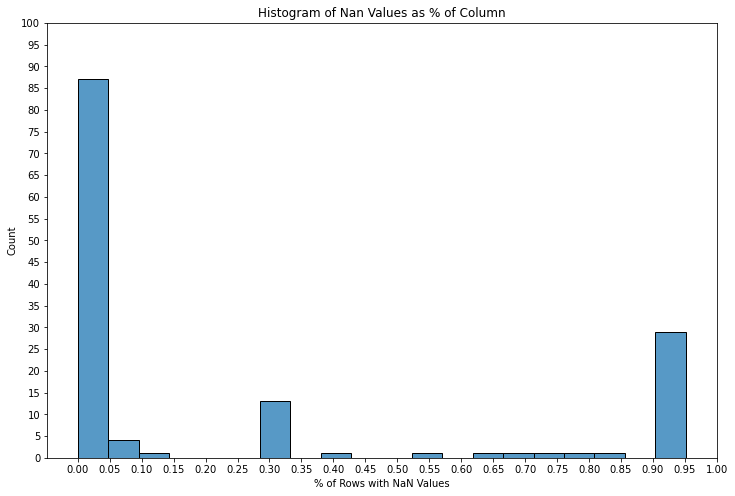

In [23]:
fig,ax = plt.subplots(figsize=(12,8))
sns.histplot(data=df.isna().mean(),bins=20)
plt.xticks(np.linspace(0,1,21))
plt.title("Histogram of Nan Values as % of Column")
plt.xlabel('% of Rows with NaN Values')
plt.yticks(np.linspace(0,100,21))

Roughly 50 columns missing 25% of values in the columns will drop these

In [ ]:
df.isna().mean().sort_values(ascending=False)

In [ ]:
cols_to_drop = df.isna().mean()

In [25]:
df.isna().mean().reset_index()

,index,0
0,id,0.000000e+00
1,loan_amnt,3.418227e-07
2,funded_amnt,3.418227e-07
3,funded_amnt_inv,3.418227e-07
4,term,3.418227e-07
...,...,...
136,hardship_loan_status,9.509789e-01
137,orig_projected_additional_accrued_interest,9.387317e-01
138,hardship_payoff_balance_amount,9.377623e-01
139,hardship_last_payment_amount,9.377623e-01


In [12]:
nan_pct = df.isna().mean().reset_index().sort_values(by=0,ascending=False)

In [13]:
cols_to_drop.values

NameError: name 'cols_to_drop' is not defined

In [14]:
cols_to_drop = nan_pct[nan_pct[0] >=.25]['index']
cols_to_drop

Series([], Name: index, dtype: object)

In [35]:
df.drop(columns=cols_to_drop,axis=1,inplace=True)

In [44]:
#checking predictors for multicollinearity
test = df.corr().abs().stack().reset_index().sort_values(0,ascending=False)
test['pairs'] = list(zip(test.level_0,test.level_1))
test.set_index(['pairs'], inplace=True)
test.drop(columns=['level_1','level_0'], inplace=True)
test.columns = ['cc']
test.drop_duplicates(inplace=True)
test.sort_values('cc',ascending=False, inplace=True)
multicollinear_predictors = test[test.cc >.75]
multicollinear_predictors.reset_index(inplace=True)

In [46]:
multicollinear_predictors['column_1'] = multicollinear_predictors.pairs.map(lambda x : x[0])
multicollinear_predictors['column_2'] = multicollinear_predictors.pairs.map(lambda x : x[1])

<ipython-input-46-a30768636eb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multicollinear_predictors['column_1'] = multicollinear_predictors.pairs.map(lambda x : x[0])
<ipython-input-46-a30768636eb9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multicollinear_predictors['column_2'] = multicollinear_predictors.pairs.map(lambda x : x[1])


In [50]:
pd.options.display.max_rows = 40

In [51]:
multicollinear_predictors

,pairs,cc,column_1,column_2
0,"(loan_amnt, loan_amnt)",1.000000,loan_amnt,loan_amnt
1,"(fico_range_low, fico_range_high)",1.000000,fico_range_low,fico_range_high
2,"(out_prncp, out_prncp_inv)",0.999998,out_prncp,out_prncp_inv
3,"(funded_amnt, loan_amnt)",0.999822,funded_amnt,loan_amnt
4,"(total_pymnt_inv, total_pymnt)",0.999569,total_pymnt_inv,total_pymnt
5,"(funded_amnt, funded_amnt_inv)",0.999520,funded_amnt,funded_amnt_inv
6,"(loan_amnt, funded_amnt_inv)",0.999299,loan_amnt,funded_amnt_inv
7,"(num_sats, open_acc)",0.999149,num_sats,open_acc
8,"(num_actv_rev_tl, num_rev_tl_bal_gt_0)",0.986211,num_actv_rev_tl,num_rev_tl_bal_gt_0
9,"(collection_recovery_fee, recoveries)",0.979642,collection_recovery_fee,recoveries


In [130]:
df.drop(columns=corr_drops,axis=1,inplace=True)

In [129]:
corr_drops = ['out_prncp_inv','total_pymnt_inv','funded_amnt_inv','funded_amnt',
              'num_sats','tot_hi_cred_lim','num_rev_tl_bal_gt_0','collection_recovery_fee'
             ,'bc_open_to_buy','percent_bc_gt_75','open_acc','num_actv_bc_tl','num_actv_rev_tl','num_rev_accts'
             ,'total_rev_hi_lim']

Modify:
1. fico_low high take average
2. last_fico_range_high low average


Drop:
 - out_prncp_inv
 - total_pymnt_inv
 - funded_amnt_inv
 - funded_amnt these
 - num_sats
 - member_id
 - num_rev_tl_bal_gt_0
 - collection_recovery_fee
 - bc_open_to_buy
 - percent_bc_gt_75
 - open_acc
 - num_actv_bc_tl
 - num_actv_rev_tl
 - num_rev_accts
 - tot_hi_cred_lim
 - total_rev_hi_lim
 

([<matplotlib.axis.YTick at 0x2c141421370>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

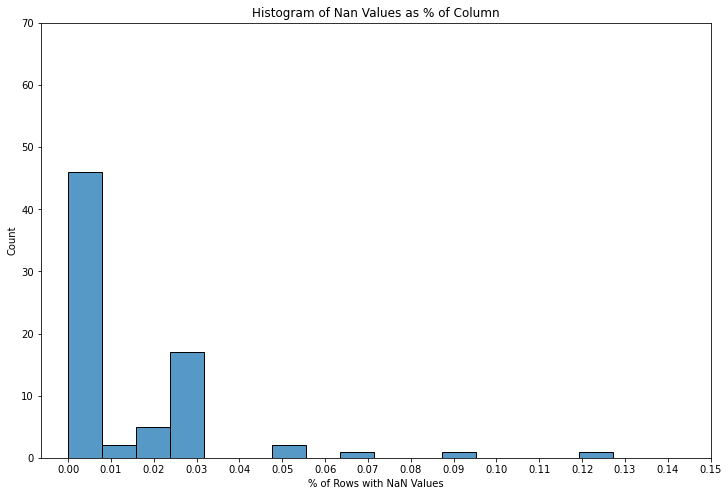

In [141]:
fig,ax = plt.subplots(figsize=(12,8))
sns.histplot(data=df.isna().mean(),bins=16)
plt.xticks(np.linspace(0,.15,16))
plt.title("Histogram of Nan Values as % of Column")
plt.xlabel('% of Rows with NaN Values')
plt.yticks(np.linspace(0,70,8))

In [168]:
rem_nans = None


In [17]:
def na_check(data):
    check = np.round(data.isna().mean().sort_values(ascending=False),2)
    return check

1860331 of loans fully paid or charged off i.e. target variable

In [15]:
clean = df.loc[df['loan_status'].isin(['Fully Paid','Charged Off'])]
len(clean)

1860331

In [18]:
na_check(clean).head(20)

mths_since_recent_inq    0.12
num_tl_120dpd_2m         0.07
emp_title                0.07
mo_sin_old_il_acct       0.07
emp_length               0.06
                         ... 
num_tl_op_past_12m       0.04
mo_sin_rcnt_tl           0.04
num_bc_tl                0.04
num_il_tl                0.04
num_op_rev_tl            0.04
Length: 20, dtype: float64

In [19]:
rem_nans = np.round(clean.isna().mean().sort_values(ascending=False),2)
five_pc_nan = list(rem_nans[(rem_nans>0) & (rem_nans <.05)].index)

clean.dropna(subset=five_pc_nan,inplace=True)

<ipython-input-19-52187b9c0e41>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean.dropna(subset=five_pc_nan,inplace=True)


0.07% of rows dropped for nan values or 119,268 rows

In [ ]:
rem = ['mths_since_recent_inq', 'emp_title', 'emp_length', 'num_tl_120dpd_2m',
       'mo_sin_old_il_acct']

In [20]:
(na_check(clean)).head(10)

mths_since_recent_inq    0.10
emp_title                0.07
emp_length               0.06
num_tl_120dpd_2m         0.04
mo_sin_old_il_acct       0.03
last_pymnt_d             0.00
dti                      0.00
last_credit_pull_d       0.00
zip_code                 0.00
inq_last_6mths           0.00
dtype: float64

In [24]:
clean.issue_d

42536      Dec-2013
42537      Dec-2013
42538      Dec-2013
42539      Dec-2013
42540      Dec-2013
             ...   
2925488    Apr-2017
2925489    Apr-2017
2925490    Apr-2017
2925491    Apr-2017
2925492    Apr-2017
Name: issue_d, Length: 1741063, dtype: object

In [25]:
clean.issue_d = pd.to_datetime(clean.issue_d)

C:\Users\sergi\anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Relevant path to save csv file:
C:\Users\sergi\Documents\Flatiron\Course Materials\Capstone\Capstone-Placeholder\data\Loan_status_2007-2020Q3.gzip

In [27]:
clean.to_csv('data\cleaned_data')

In [108]:
pre_covid = clean[clean.issue_d < '2020-03']

In [145]:
pd.options.display.max_columns = 10
pd.options.display.max_rows = 10

In [129]:
pre_covid['term'] = pre_covid['term'].map(lambda x: int(x.replace(' months','')))

<ipython-input-129-62bdc0e83941>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_covid['term'] = pre_covid['term'].map(lambda x: int(x.replace(' months','')))


In [138]:
pre_covid.iloc[0]

id                            10129454
loan_amnt                        12000
term                                36
int_rate                        10.99%
installment                     392.75
                                ...   
total_bal_ex_mort                 7137
total_bc_limit                   18100
total_il_high_credit_limit           0
hardship_flag                        N
debt_settlement_flag                 N
Name: 42536, Length: 75, dtype: object

In [ ]:
for row in range(0,len(pre_covid)):
    

In [130]:
pre_covid['issue_d'] + pd.offsets.MonthOffset(pre_covid['term'])

TypeError: Addition/subtraction of integers and integer-arrays with DatetimeArray is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

In [ ]:
pre_covid['issue_d'] + pre_covid['term']

In [121]:
pre_covid['last_pymnt_d']

42536      Apr-2016
42537      Sep-2014
42538      Jul-2016
42539      Jun-2016
42540      Jan-2017
             ...   
2925488    Mar-2018
2925489    Oct-2019
2925490    May-2019
2925491    Jan-2019
2925492    Oct-2017
Name: last_pymnt_d, Length: 1739518, dtype: object

In [122]:
pre_covid[pre_covid['mths_since_recent_inq'].isna() == True]['last_pymnt_d']

42540      Jan-2017
42568      Apr-2016
42569      Dec-2016
42575      Jul-2016
42592      Feb-2014
             ...   
2925341    Apr-2020
2925435    Aug-2017
2925457    Aug-2018
2925462    Aug-2017
2925478    Jan-2018
Name: last_pymnt_d, Length: 175487, dtype: object

In [101]:
covid_start = pd.to_datetime('2020-03')

In [51]:
clean.last_credit_pull_d

count      1741002
unique          99
top       May-2020
freq        524887
Name: last_credit_pull_d, dtype: object

In [53]:
pd.to_datetime(clean.last_credit_pull_d).value_counts()

2020-05-01    524887
2020-03-01    101294
2019-11-01     71323
2020-01-01     71028
2020-04-01     58979
               ...  
2012-11-01        27
2012-10-01        14
2013-01-01        12
2012-09-01         2
2012-08-01         1
Name: last_credit_pull_d, Length: 99, dtype: int64

In [49]:
clean.last_credit_pull_d = pd.to_datetime(clean.last_credit_pull_d)

May-2020    524887
Mar-2020    101294
Nov-2019     71323
Jan-2020     71028
Apr-2020     58979
             ...  
Nov-2012        27
Oct-2012        14
Jan-2013        12
Sep-2012         2
Aug-2012         1
Name: last_credit_pull_d, Length: 99, dtype: int64

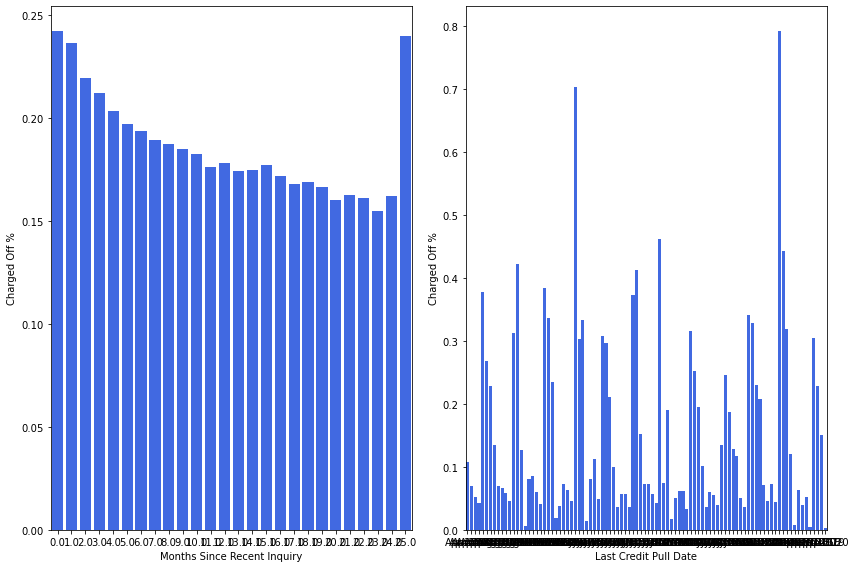

In [48]:
fig,axes = plt.subplots(1,2,figsize=(12,8))
charge_off_rates = clean.groupby('mths_since_recent_inq')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='royalblue', saturation=1,ax=axes[0])
axes[0].set(xlabel='Months Since Recent Inquiry',ylabel='Charged Off %')

charge_off_rates = clean.groupby('last_credit_pull_d')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='royalblue', saturation=1,ax=axes[1])
axes[1].set(xlabel='Last Credit Pull Date',ylabel='Charged Off %')


plt.tight_layout()

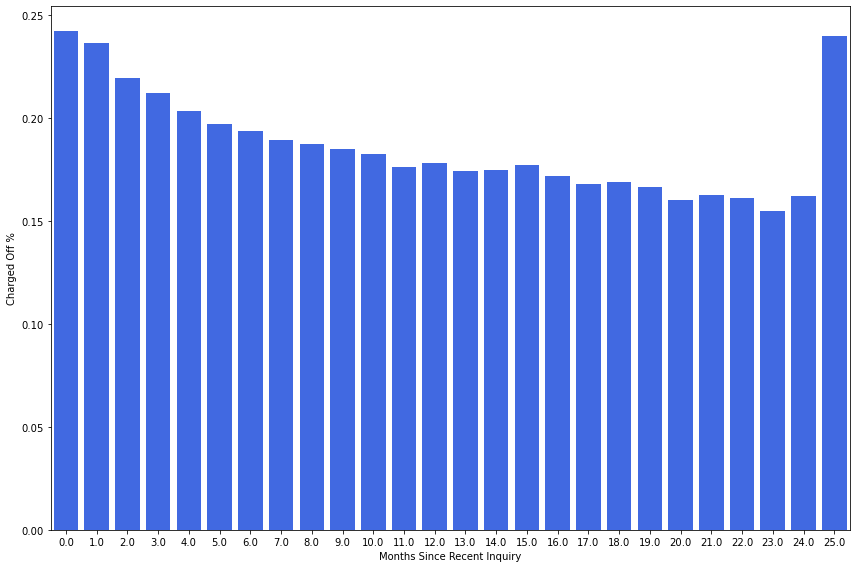

In [44]:
fig,ax = plt.subplots(figsize=(12,8))
charge_off_rates = clean.groupby('mths_since_recent_inq')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='royalblue', saturation=1,)
plt.xlabel('Months Since Recent Inquiry')
plt.ylabel('Charged Off %')

plt.tight_layout()

In [ ]:
sns.lineplot(x='issue_d',y='mths_since_recent_inq',hue='loan_status',data = clean)

In [ ]:
clean['issue_d'] = pd.to_datetime(clean['issue_d'])
clean['issue_d']

In [221]:
clean['issue_d'].astype(np.float64)

TypeError: cannot astype a datetimelike from [datetime64[ns]] to [float64]

In [224]:
len(clean)

1741063

In [239]:
covid_start = pd.to_datetime('2020-3',format='%Y/%m')
covid_start

Timestamp('2020-03-01 00:00:00')

In [229]:
clean['issue_d'] > covid_start

42536      True
42537      True
42538      True
42539      True
42540      True
           ... 
2925488    True
2925489    True
2925490    True
2925491    True
2925492    True
Name: issue_d, Length: 1741063, dtype: bool

In [ ]:
mask = (clean['issue_d'] > covid_start)

In [245]:
clean['issue_d'].map(lambda x: str(x))

42536      2013-12-01 00:00:00
42537      2013-12-01 00:00:00
42538      2013-12-01 00:00:00
42539      2013-12-01 00:00:00
42540      2013-12-01 00:00:00
                  ...         
2925488    2017-04-01 00:00:00
2925489    2017-04-01 00:00:00
2925490    2017-04-01 00:00:00
2925491    2017-04-01 00:00:00
2925492    2017-04-01 00:00:00
Name: issue_d, Length: 1741063, dtype: object

In [244]:
clean['issue_d'][:2020]

42536   2013-12-01
42537   2013-12-01
42538   2013-12-01
42539   2013-12-01
42540   2013-12-01
           ...    
44564   2013-12-01
44566   2013-12-01
44567   2013-12-01
44568   2013-12-01
44569   2013-12-01
Name: issue_d, Length: 2020, dtype: datetime64[ns]

In [223]:
len(clean['issue_d'][3-2020:]) - len(clean['issue_d'][:2020-3])

1737029

<AxesSubplot:xlabel='issue_d', ylabel='mths_since_recent_inq'>

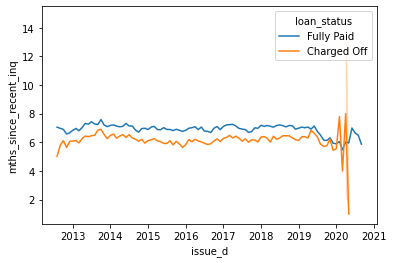

In [209]:
sns.lineplot(x='issue_d',y='mths_since_recent_inq',hue='loan_status',data = clean)

In [204]:
clean['mths_since_recent_bc'].value_counts()

3.0      86428
2.0      84867
4.0      82540
5.0      77442
6.0      72279
         ...  
494.0        1
616.0        1
615.0        1
612.0        1
510.0        1
Name: mths_since_recent_bc, Length: 509, dtype: int64

In [207]:
for col in clean.columns:
    print('{}:{}'.format(col,column_info(col)))

id:A unique LC assigned ID for the loan listing.
loan_amnt:The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
term:The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate:Interest Rate on the loan
installment:The monthly payment owed by the borrower if the loan originates.
grade:LC assigned loan grade
sub_grade:LC assigned loan subgrade
emp_title:The job title supplied by the Borrower when applying for the loan.*
emp_length:Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
home_ownership:The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
annual_inc:The self-reported annual income provided by the borrower during registration.
verification_status:Indicat

In [202]:
clean['mths_since_recent_inq'].value_counts()

1.0     175362
2.0     141979
0.0     138840
3.0     128557
4.0     116646
5.0     103285
6.0      92447
7.0      87528
8.0      76644
9.0      66982
10.0     58944
11.0     52694
12.0     47308
13.0     42272
14.0     37289
15.0     32325
16.0     28383
17.0     25278
18.0     22475
19.0     20221
20.0     18134
21.0     16421
22.0     14884
23.0     13811
24.0      6773
25.0        25
Name: mths_since_recent_inq, dtype: int64

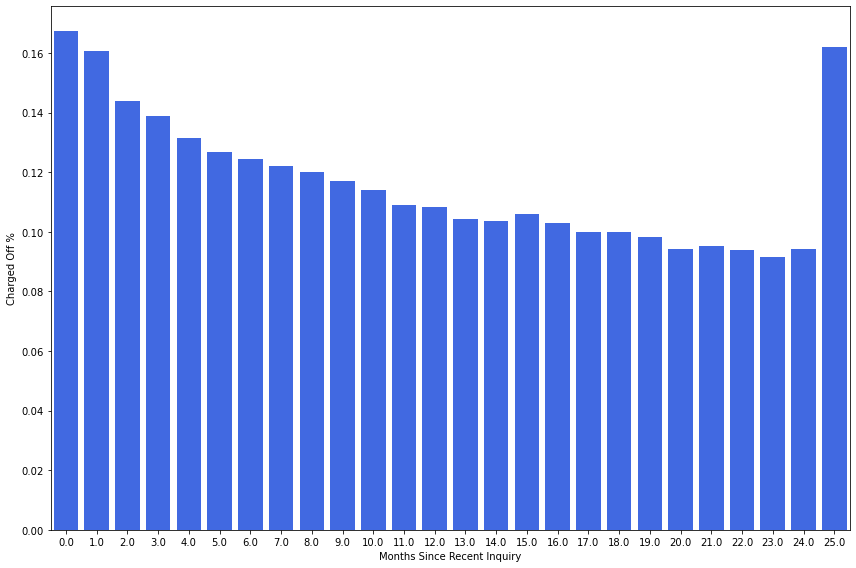

In [159]:
fig,ax = plt.subplots(figsize=(12,8))
charge_off_rates = df.groupby('mths_since_recent_inq')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='royalblue', saturation=1,)
plt.xlabel('Months Since Recent Inquiry')
plt.ylabel('Charged Off %')

plt.tight_layout()

In [96]:
df['int_rate'] =  df['int_rate'].map(lambda x: str(x).replace('%','')).astype(np.float16)

In [68]:
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['issue_d']

0         2011-12-01
1         2011-12-01
2         2011-12-01
3         2011-12-01
4         2011-12-01
             ...    
2925488   2017-04-01
2925489   2017-04-01
2925490   2017-04-01
2925491   2017-04-01
2925492   2017-04-01
Name: issue_d, Length: 2925493, dtype: datetime64[ns]

<AxesSubplot:xlabel='issue_d', ylabel='int_rate'>

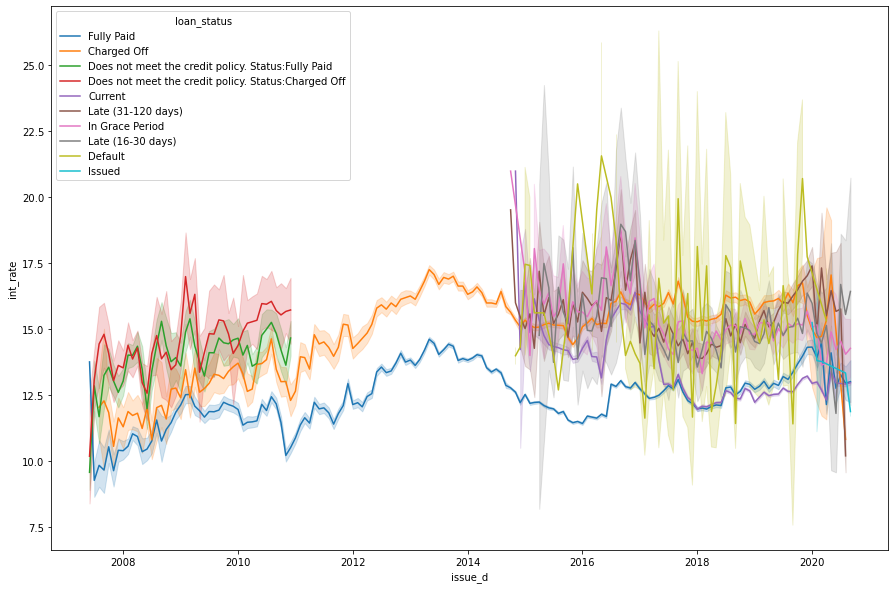

In [99]:
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x='issue_d',y='int_rate',hue='loan_status' ,data=df,ax=ax)

In [67]:
df['loan_status'].value_counts()

Fully Paid                                             1497783
Current                                                1031016
Charged Off                                             362548
Late (31-120 days)                                       16154
In Grace Period                                          10028
Late (16-30 days)                                         2719
Issued                                                    2062
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                    433
Name: loan_status, dtype: int64

In [65]:
loan_statuses = list(df['loan_status'].value_counts().index)

In [66]:
loan_statuses

['Fully Paid',
 'Current',
 'Charged Off',
 'Late (31-120 days)',
 'In Grace Period',
 'Late (16-30 days)',
 'Issued',
 'Does not meet the credit policy. Status:Fully Paid',
 'Does not meet the credit policy. Status:Charged Off',
 'Default']

In [ ]:
df.loc[df['loan_status'].isin(['Fully Paid','Charged Off'])]

In [ ]:
df['loan_status']

In [46]:
d10 = dict((k,v) for k,v in normalized_nans(df).items() if v >=.10)

In [47]:
nansdf10 = pd.DataFrame(data=d10.values(),columns=['%_rows_with_NaN'],index=d10.keys()).sort_values('%_rows_with_NaN',ascending=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'mths_since_recent_inq'),
  Text(0, 1, 'open_acc_6m'),
  Text(0, 2, 'open_act_il'),
  Text(0, 3, 'open_il_12m'),
  Text(0, 4, 'open_il_24m'),
  Text(0, 5, 'total_bal_il'),
  Text(0, 6, 'open_rv_12m'),
  Text(0, 7, 'open_rv_24m'),
  Text(0, 8, 'max_bal_bc'),
  Text(0, 9, 'inq_fi'),
  Text(0, 10, 'total_cu_tl'),
  Text(0, 11, 'inq_last_12m'),
  Text(0, 12, 'all_util')])

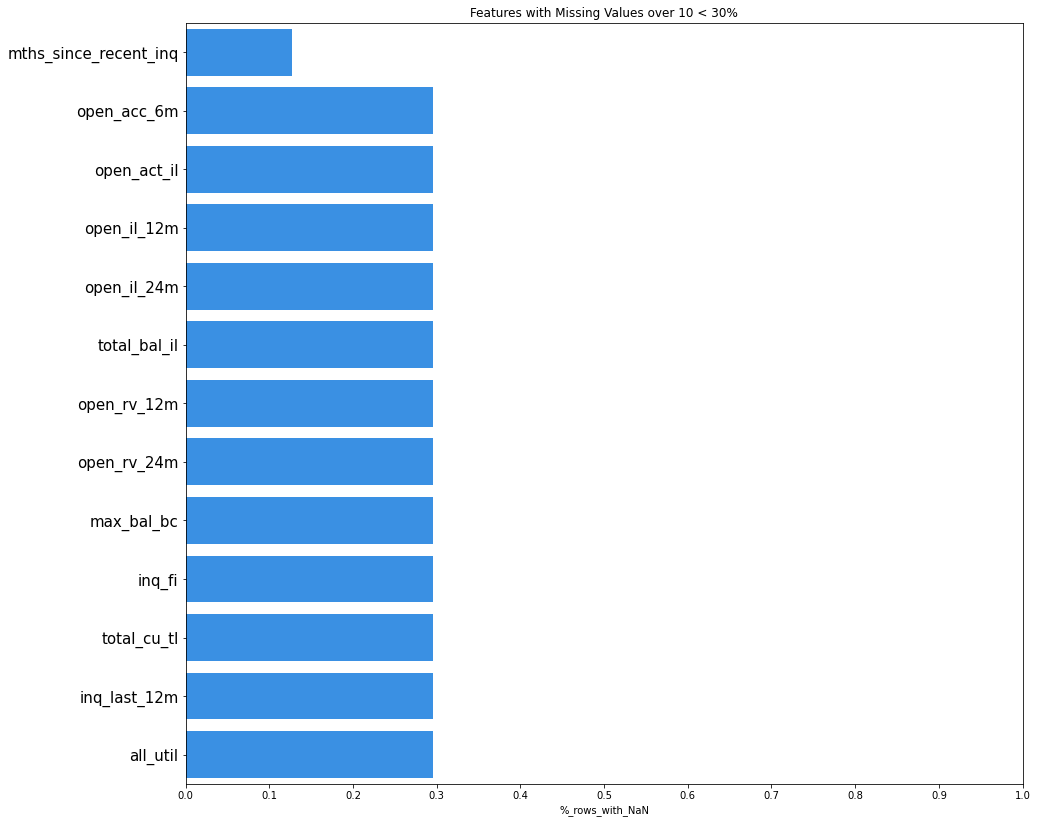

In [48]:
fig,ax = plt.subplots(figsize=(15,14))
sns.barplot(y=nansdf10.index,x='%_rows_with_NaN',data=nansdf10,color='dodgerblue')
plt.xlim(0,1)
plt.xticks(np.linspace(0,1,11))
plt.title('Features with Missing Values over 10 < 30%')
plt.yticks(fontsize=15)

In [49]:
for idx,key in enumerate(d10.keys()):
    print('{}: {}, {}'.format(idx, key, column_info(key)))


0: open_acc_6m, Number of open trades in last 6 months
1: open_act_il, Number of currently active installment trades
2: open_il_12m, Number of installment accounts opened in past 12 months
3: open_il_24m, Number of installment accounts opened in past 24 months
4: total_bal_il, Total current balance of all installment accounts
5: open_rv_12m, Number of revolving trades opened in past 12 months
6: open_rv_24m, Number of revolving trades opened in past 24 months
7: max_bal_bc, Maximum current balance owed on all revolving accounts
8: all_util, Balance to credit limit on all trades
9: inq_fi, Number of personal finance inquiries
10: total_cu_tl, Number of finance trades
11: inq_last_12m, Number of credit inquiries in past 12 months
12: mths_since_recent_inq, Months since most recent inquiry.


In [134]:
pd.options.display.max_rows = 75

## Freddie columns and df

In [16]:
columns = ['credit_score','first_payment_date','first_time_homebuyer_flag','maturity_date','metro_area','MI%','#_of_units','occupancy_status',
          'original_combined_LTV','original_DTI','original_UPB','original_LTV','og_ir','channel','PPM_flag','product_type','property_state'
           ,'property_type','postal_code','loan_sequence_number','loan_purpose','original_loan_term','#_of_borrowers','seller_name',
           'servicer_name','super_conforming_flag','pre_harp_loan_sequence#','program_indicator','harp_indicator','property_valuation_method']

In [18]:
df.columns=columns

In [19]:
df


,credit_score,first_payment_date,first_time_homebuyer_flag,maturity_date,metro_area,MI%,#_of_units,occupancy_status,original_combined_LTV,original_DTI,...,loan_purpose,original_loan_term,#_of_borrowers,seller_name,servicer_name,super_conforming_flag,pre_harp_loan_sequence#,program_indicator,harp_indicator,property_valuation_method
0,768,201905,N,204904,22020.0,0,1,P,52,36,...,P,360,2,Other sellers,Other servicers,NaN,NaN,9,NaN,2
1,798,201903,Y,204902,31084.0,0,1,P,80,49,...,P,360,1,Other sellers,Other servicers,NaN,NaN,9,NaN,2
2,789,201904,9,202903,45780.0,0,1,P,39,43,...,C,120,1,Other sellers,"PNC BANK, NA",NaN,NaN,9,NaN,2
3,782,201903,N,204902,24260.0,0,1,P,80,26,...,P,360,2,Other sellers,Other servicers,NaN,NaN,9,NaN,2
4,773,201905,9,204904,NaN,0,1,P,80,27,...,C,360,1,Other sellers,Other servicers,NaN,NaN,9,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265508,770,202009,9,205008,12260.0,25,1,P,86,21,...,N,360,2,Other sellers,Other servicers,NaN,NaN,9,NaN,2
265509,741,202008,9,205007,49420.0,0,1,P,59,43,...,N,360,2,Other sellers,Other servicers,NaN,NaN,9,NaN,2
265510,711,202010,9,205009,24860.0,25,1,P,90,32,...,N,360,2,Other sellers,Other servicers,NaN,NaN,9,NaN,2
265511,793,202008,9,205007,NaN,30,1,P,94,50,...,N,360,1,Other sellers,Other servicers,NaN,NaN,9,NaN,2
